In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc10 = np.loadtxt('./random_ipc_index/cifar100/ipc_10.txt', dtype=int)
ipc10

array([24191, 42285, 34712, 33034, 42768, 13876, 20039, 24149, 45097,
       29268, 27350, 44039,  2241, 23335, 41409, 44162, 13994, 39276,
       37530, 17750, 33042, 37645, 22661, 43247, 30172,  4846, 13089,
       30026, 16629, 19348, 45087, 34563,  6583, 12034, 18184, 13295,
       33547, 39685, 48638,   317, 45270,  7420, 29693, 16113, 42099,
       35597,  4109, 10074, 20257, 35552, 40167,  6816, 47175, 34185,
       40532, 42898, 29323, 33381,  7234,  9890, 36472, 38904, 23361,
       35545, 44077, 39988, 17836, 43619, 26675, 34209,  9366, 45078,
        4355,  8431,   961, 34136,   744, 19935, 31383, 37030, 18878,
       30631, 13008,  4039,  5921, 43448, 22775, 34254, 47409, 26164,
       11617, 24511, 33811, 10272, 26990, 48967, 46065, 39258,     4,
       24185])

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 4
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc10))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

25

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar100_ipc10'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=100, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 25/25 [00:00<00:00, 71.67it/s, loss=3.89]


epoch: 1 done, loss: 0.001676220097579062
Acc: 0.0227
[0.01]


Epoch 2: 100%|██████████| 25/25 [00:00<00:00, 195.74it/s, loss=1.44]

epoch: 2 done, loss: 0.0010431327391415834


Acc: 0.0198
[0.01]


Epoch 3: 100%|██████████| 25/25 [00:00<00:00, 189.07it/s, loss=1.29]

epoch: 3 done, loss: 0.0009592125425115228


Acc: 0.0252
[0.01]


Epoch 4: 100%|██████████| 25/25 [00:00<00:00, 195.78it/s, loss=1.23]

epoch: 4 done, loss: 0.0007521443767473102


Acc: 0.0257
[0.01]


Epoch 5: 100%|██████████| 25/25 [00:00<00:00, 182.36it/s, loss=0.877]

epoch: 5 done, loss: 0.0006152899586595595


Acc: 0.0308
[0.01]


Epoch 6: 100%|██████████| 25/25 [00:00<00:00, 190.64it/s, loss=1.82] 

epoch: 6 done, loss: 0.000527380732819438


Acc: 0.0283
[0.01]


Epoch 7: 100%|██████████| 25/25 [00:00<00:00, 213.34it/s, loss=0.554]

epoch: 7 done, loss: 0.00041928491555154324


Acc: 0.0315
[0.001]


Epoch 8: 100%|██████████| 25/25 [00:00<00:00, 172.39it/s, loss=0.323]

epoch: 8 done, loss: 0.00021550004021264613


Acc: 0.0318
[0.001]


Epoch 9: 100%|██████████| 25/25 [00:00<00:00, 192.62it/s, loss=0.316]

epoch: 9 done, loss: 0.0002198658330598846


Acc: 0.0326
[0.001]


Epoch 10: 100%|██████████| 25/25 [00:00<00:00, 218.89it/s, loss=0.322]

epoch: 10 done, loss: 0.00017082133854273707


Acc: 0.0331
[0.001]


Epoch 11: 100%|██████████| 25/25 [00:00<00:00, 201.23it/s, loss=0.771]

epoch: 11 done, loss: 0.0001837659947341308


Acc: 0.0327
[0.0001]


Epoch 12: 100%|██████████| 25/25 [00:00<00:00, 193.43it/s, loss=0.153]

epoch: 12 done, loss: 0.00016504038649145514


Acc: 0.033
[0.0001]


Epoch 13: 100%|██████████| 25/25 [00:00<00:00, 206.05it/s, loss=0.16] 

epoch: 13 done, loss: 0.00017066826694644988


Acc: 0.0327
[0.0001]


Epoch 14: 100%|██████████| 25/25 [00:00<00:00, 173.87it/s, loss=0.244]

epoch: 14 done, loss: 0.00017177815607283264


Acc: 0.033
[0.0001]


Epoch 15: 100%|██████████| 25/25 [00:00<00:00, 166.71it/s, loss=0.108]

epoch: 15 done, loss: 0.00014797865878790617


Acc: 0.0332
[1e-05]


Epoch 16: 100%|██████████| 25/25 [00:00<00:00, 194.15it/s, loss=0.269] 

epoch: 16 done, loss: 0.00015624152729287744


Acc: 0.0331
[1e-05]


Epoch 17: 100%|██████████| 25/25 [00:00<00:00, 194.54it/s, loss=0.352]

epoch: 17 done, loss: 0.00017342442879453301


Acc: 0.0333
[1e-05]


Epoch 18: 100%|██████████| 25/25 [00:00<00:00, 183.96it/s, loss=0.263]

epoch: 18 done, loss: 0.00014270265819504857


Acc: 0.0332
[1e-05]


Epoch 19: 100%|██████████| 25/25 [00:00<00:00, 192.66it/s, loss=0.219] 

epoch: 19 done, loss: 0.00014137076504994184


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 25/25 [00:00<00:00, 191.99it/s, loss=0.301]

epoch: 20 done, loss: 0.00016177409270312637


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 25/25 [00:00<00:00, 192.61it/s, loss=0.173]

epoch: 21 done, loss: 0.00015016025281511247


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 25/25 [00:00<00:00, 208.40it/s, loss=0.0822]

epoch: 22 done, loss: 0.00013834322453476489


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 25/25 [00:00<00:00, 162.13it/s, loss=1.24]  

epoch: 23 done, loss: 0.0001537611533422023


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 25/25 [00:00<00:00, 189.93it/s, loss=1.19] 

epoch: 24 done, loss: 0.00015833049837965518


Acc: 0.0332
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 25/25 [00:00<00:00, 196.17it/s, loss=0.117]

epoch: 25 done, loss: 0.0001770039089024067


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 25/25 [00:00<00:00, 192.55it/s, loss=0.113] 

epoch: 26 done, loss: 0.000136221045977436


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 25/25 [00:00<00:00, 208.91it/s, loss=0.251] 

epoch: 27 done, loss: 0.00019705409067682922


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 25/25 [00:00<00:00, 192.08it/s, loss=0.0761]

epoch: 28 done, loss: 0.00014148127229418606


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 25/25 [00:00<00:00, 216.34it/s, loss=0.76] 

epoch: 29 done, loss: 0.00018064677715301514


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 25/25 [00:00<00:00, 180.16it/s, loss=0.333]

epoch: 30 done, loss: 0.00016237626550719142


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 25/25 [00:00<00:00, 190.33it/s, loss=0.153]

epoch: 31 done, loss: 0.0001596390939084813


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 25/25 [00:00<00:00, 208.24it/s, loss=0.19]  

epoch: 32 done, loss: 0.00018206299864687026


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 25/25 [00:00<00:00, 197.74it/s, loss=0.229]

epoch: 33 done, loss: 0.00016266517923213542


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 25/25 [00:00<00:00, 198.33it/s, loss=0.282] 

epoch: 34 done, loss: 0.00016959937056526542


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 25/25 [00:00<00:00, 181.31it/s, loss=0.0749]

epoch: 35 done, loss: 0.00018215923046227545


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 25/25 [00:00<00:00, 205.72it/s, loss=0.646]

epoch: 36 done, loss: 0.00015461782459169626


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 25/25 [00:00<00:00, 220.88it/s, loss=1.32] 

epoch: 37 done, loss: 0.00016872116248123348


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 25/25 [00:00<00:00, 215.22it/s, loss=0.855]

epoch: 38 done, loss: 0.0001426923554390669


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 25/25 [00:00<00:00, 183.96it/s, loss=0.245]

epoch: 39 done, loss: 0.00018692479352466762


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 25/25 [00:00<00:00, 187.75it/s, loss=0.715] 

epoch: 40 done, loss: 0.00017266631766688079


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 25/25 [00:00<00:00, 196.51it/s, loss=0.0887]

epoch: 41 done, loss: 0.00013465121446643025


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 25/25 [00:00<00:00, 159.33it/s, loss=0.83] 

epoch: 42 done, loss: 0.00016994139878079295


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 25/25 [00:00<00:00, 177.07it/s, loss=0.17] 

epoch: 43 done, loss: 0.00017468570149503648


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 25/25 [00:00<00:00, 194.90it/s, loss=0.228] 

epoch: 44 done, loss: 0.00016219694225583225


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 25/25 [00:00<00:00, 149.00it/s, loss=0.156]

epoch: 45 done, loss: 0.0001396352454321459


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 25/25 [00:00<00:00, 153.36it/s, loss=0.271] 

epoch: 46 done, loss: 0.00013808162475470454


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 25/25 [00:00<00:00, 180.56it/s, loss=0.147] 

epoch: 47 done, loss: 0.0001614275824977085


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 25/25 [00:00<00:00, 172.77it/s, loss=0.21]  

epoch: 48 done, loss: 0.00014935170474927872


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 25/25 [00:00<00:00, 165.65it/s, loss=0.246]

epoch: 49 done, loss: 0.0001541559031466022


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 25/25 [00:00<00:00, 162.67it/s, loss=0.235]

epoch: 50 done, loss: 0.00018456662655808032


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 25/25 [00:00<00:00, 147.89it/s, loss=0.122] 

epoch: 51 done, loss: 0.000153577042510733


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 25/25 [00:00<00:00, 138.09it/s, loss=0.231]


epoch: 52 done, loss: 0.0001665099844103679
Acc: 0.0333
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 25/25 [00:00<00:00, 167.43it/s, loss=0.643] 

epoch: 53 done, loss: 0.00017484763520769775


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 25/25 [00:00<00:00, 160.30it/s, loss=0.483]

epoch: 54 done, loss: 0.00015532954421360046


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 25/25 [00:00<00:00, 135.45it/s, loss=0.403] 


epoch: 55 done, loss: 0.00014733659918420017
Acc: 0.0333
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 25/25 [00:00<00:00, 157.27it/s, loss=0.446]

epoch: 56 done, loss: 0.00015586207155138254


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 25/25 [00:00<00:00, 168.91it/s, loss=0.709] 

epoch: 57 done, loss: 0.00014101946726441383


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 25/25 [00:00<00:00, 155.49it/s, loss=0.178]

epoch: 58 done, loss: 0.00015781937690917403


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 25/25 [00:00<00:00, 153.69it/s, loss=0.286]

epoch: 59 done, loss: 0.0001362741313641891


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 25/25 [00:00<00:00, 156.49it/s, loss=0.236] 

epoch: 60 done, loss: 0.00014450795424636453


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 25/25 [00:00<00:00, 163.60it/s, loss=0.501]

epoch: 61 done, loss: 0.00016549161227885634


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 25/25 [00:00<00:00, 143.57it/s, loss=0.356]

epoch: 62 done, loss: 0.0001497183257015422


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 25/25 [00:00<00:00, 135.55it/s, loss=0.36] 


epoch: 63 done, loss: 0.00015157138113863766
Acc: 0.0333
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 25/25 [00:00<00:00, 157.32it/s, loss=0.139] 

epoch: 64 done, loss: 0.00018496441771276295


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 25/25 [00:00<00:00, 158.52it/s, loss=0.331] 

epoch: 65 done, loss: 0.00015734239423181862


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 25/25 [00:00<00:00, 146.70it/s, loss=0.344]


epoch: 66 done, loss: 0.00016272597713395953
Acc: 0.0333
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 25/25 [00:00<00:00, 145.74it/s, loss=0.38]  

epoch: 67 done, loss: 0.00014722446212545037


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 25/25 [00:00<00:00, 134.60it/s, loss=0.138] 


epoch: 68 done, loss: 0.00013443858188111335
Acc: 0.0333
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 25/25 [00:00<00:00, 164.95it/s, loss=0.435]

epoch: 69 done, loss: 0.00016999976651277393


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 25/25 [00:00<00:00, 160.20it/s, loss=0.167] 

epoch: 70 done, loss: 0.00015004965825937688


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 25/25 [00:00<00:00, 163.00it/s, loss=0.34] 

epoch: 71 done, loss: 0.0001330472296103835


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 25/25 [00:00<00:00, 188.97it/s, loss=0.122]

epoch: 72 done, loss: 0.00016281713033095002


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 25/25 [00:00<00:00, 174.65it/s, loss=0.0888]

epoch: 73 done, loss: 0.00016981606313493103


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 25/25 [00:00<00:00, 175.33it/s, loss=0.101]

epoch: 74 done, loss: 0.00015259016072377563


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 25/25 [00:00<00:00, 167.56it/s, loss=0.171]

epoch: 75 done, loss: 0.00019361426529940218


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 25/25 [00:00<00:00, 146.37it/s, loss=0.159] 

epoch: 76 done, loss: 0.00015818806423339993


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 25/25 [00:00<00:00, 166.55it/s, loss=0.136]

epoch: 77 done, loss: 0.00017206845222972333


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 25/25 [00:00<00:00, 159.14it/s, loss=0.174] 

epoch: 78 done, loss: 0.0001438547915313393


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 25/25 [00:00<00:00, 170.57it/s, loss=0.469]

epoch: 79 done, loss: 0.00015742101822979748


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 25/25 [00:00<00:00, 157.47it/s, loss=0.0863]

epoch: 80 done, loss: 0.00015902168524917215


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 25/25 [00:00<00:00, 173.71it/s, loss=0.18]  

epoch: 81 done, loss: 0.00015738859656266868


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 25/25 [00:00<00:00, 177.27it/s, loss=0.135]

epoch: 82 done, loss: 0.0001555112685309723


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 25/25 [00:00<00:00, 200.07it/s, loss=0.0952]

epoch: 83 done, loss: 0.0001606633304618299


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 25/25 [00:00<00:00, 201.13it/s, loss=0.125]

epoch: 84 done, loss: 0.00016257142124231905


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 25/25 [00:00<00:00, 193.83it/s, loss=0.134]

epoch: 85 done, loss: 0.000162444994202815


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 25/25 [00:00<00:00, 198.34it/s, loss=0.0799]

epoch: 86 done, loss: 0.00017188902711495757


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 25/25 [00:00<00:00, 192.46it/s, loss=0.161]

epoch: 87 done, loss: 0.00014880215167067945


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 25/25 [00:00<00:00, 217.21it/s, loss=0.142]

epoch: 88 done, loss: 0.00014995741366874427


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 25/25 [00:00<00:00, 195.86it/s, loss=0.164]

epoch: 89 done, loss: 0.00016871749539859593


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 25/25 [00:00<00:00, 175.66it/s, loss=0.549] 

epoch: 90 done, loss: 0.00014587417535949498


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 25/25 [00:00<00:00, 208.44it/s, loss=0.54] 

epoch: 91 done, loss: 0.00016113971651066095


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 25/25 [00:00<00:00, 208.68it/s, loss=0.313]

epoch: 92 done, loss: 0.00017288245726376772


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 25/25 [00:00<00:00, 200.25it/s, loss=1.13] 

epoch: 93 done, loss: 0.00017549702897667885


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 25/25 [00:00<00:00, 208.93it/s, loss=0.618]

epoch: 94 done, loss: 0.0001752988900989294


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 25/25 [00:00<00:00, 190.85it/s, loss=0.228]

epoch: 95 done, loss: 0.00016393899568356574


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 25/25 [00:00<00:00, 186.74it/s, loss=0.0759]

epoch: 96 done, loss: 0.00016089143173303455


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 25/25 [00:00<00:00, 189.77it/s, loss=0.933]

epoch: 97 done, loss: 0.00016298943955916911


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 25/25 [00:00<00:00, 199.48it/s, loss=0.343]

epoch: 98 done, loss: 0.00017872075841296464


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 25/25 [00:00<00:00, 188.64it/s, loss=0.251]

epoch: 99 done, loss: 0.0001505425461800769


Acc: 0.0333
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 25/25 [00:00<00:00, 187.69it/s, loss=0.256]

epoch: 100 done, loss: 0.00019367053755559027


Acc: 0.0333
[1.0000000000000002e-06]
Time taken: 509.842697 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.0333, tensor(2.2955, device='cuda:0'))

<AxesSubplot: >

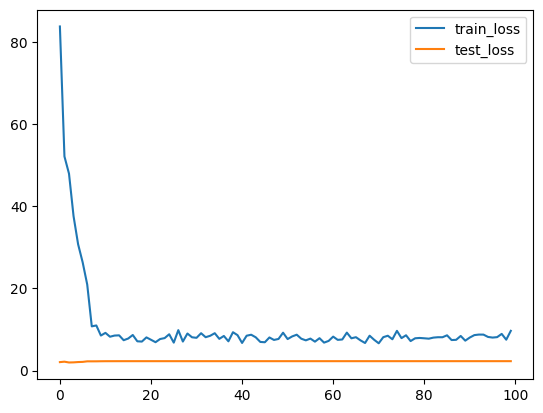

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])